## This will be the codebase for the dictionary learning portion

In [24]:
from sklearn.feature_extraction import image as image_extractor
from skimage import io
import matplotlib.pyplot as plt
from scipy import ndimage
import csv
import numpy as np
import distutils
from distutils import util

### Read the image

In [2]:
image = io.imread("0.210521.png")

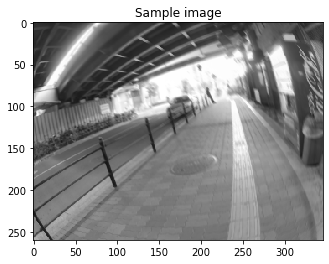

In [3]:
plt.imshow(image)
plt.title('Sample image')
plt.show()

In [4]:
image.shape

(260, 346, 3)

The above image is 260X346X3.

### Calculate the X and Y derivative using sobel operator. This is very good with edge detection

In [5]:
image_x = ndimage.sobel(image, axis=0, mode='constant')
image_y = ndimage.sobel(image, axis=1, mode='constant')

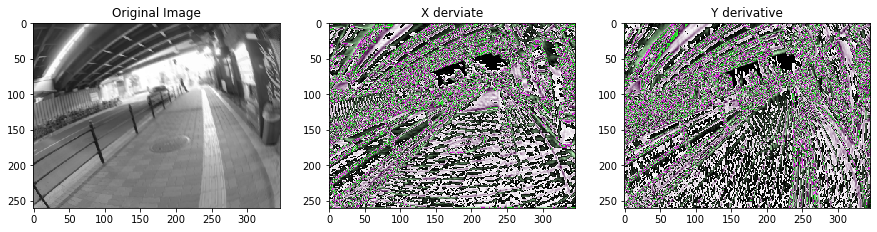

In [6]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = True)

ax1.imshow(image)
ax1.set_title('Original Image')

ax2.imshow(image_x)
ax2.set_title('X derviate')

ax3.imshow(image_y)
ax3.set_title('Y derivative')

plt.show()

In [7]:
patches_x = image_extractor.extract_patches_2d(image_x, (5, 5))
patches_y = image_extractor.extract_patches_2d(image_y, (5, 5))

## Create the event histogram

In [8]:
img_pos = np.zeros((image.shape[0], image.shape[1]), np.int)
img_neg = np.zeros((image.shape[0], image.shape[1]), np.int)

In [26]:
# read the file and store it in different arrays 
timestamp = []
x = []
y = []
pol = []

with open('C:/Users/sudes/Documents/GitHub/Computer_Vision/code/event_data.csv') as csvfile:
    event_file = csv.reader(csvfile, delimiter=',')
    next(event_file)
    for row in event_file:
        if len(row) == 0:
            continue; # while writing, an additional alternative empty row is written in the excel. so skippping
        x.append(int(row[0]))
        y.append(int(row[1]))
        timestamp.append(float(row[2]))
        pol.append(distutils.util.strtobool(row[3]))
        
assert len(x) == len(y) == len(pol) == len(timestamp)

In [27]:
num_events = len(x)

In [28]:
# %% Positive and negative events in separate images
# Took this portion from https://gitlab.tubit.tu-berlin.de/guillermo.gallego/events_viz/blob/master/ex2_events_visualization.py
for i in range(num_events):
    if (pol[i]):
        img_pos[y[i],x[i]] += 1
    else:
        img_neg[y[i],x[i]] += 1


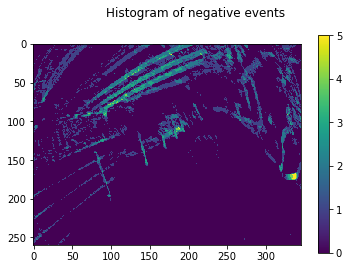

In [29]:
fig = plt.figure()
fig.suptitle('Histogram of negative events')
plt.imshow(img_neg)
plt.colorbar()
plt.show()


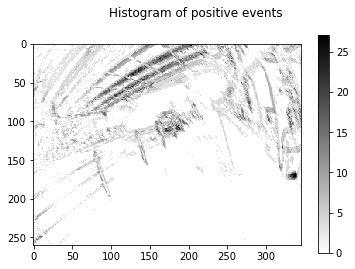

In [30]:
fig = plt.figure()
fig.suptitle('Histogram of positive events')
plt.imshow(img_pos, cmap='gray_r')
plt.colorbar()
plt.show()
